#### Foundations of Statistical Modeling
#### Prof. Dr. Stefan Kettemann
#### Spring term 2024
#### Exercise sheet 6, submit on Monday May 6th, 2024 on Moodle
#### Your name:Protogene Hahirwabayo 

1. Correlation, Scatter Plot [5 Points]
Choose from your data set 2 numerical features where you have at least 100 data in a discrete
DVS S (if it is a continuous S, choose a bin of some width a). Describe the RV function you
have chosen and define the DVSs {S1, S2}. Plot the marginal distribution of both RV features,
the scatter plots for the pair of features, and give their Pearson correlation. Discuss the result
and conclude whether the two features are correlated, anticorrelated or uncorrelated.
2. Joint pmf [5 Points]
Plot for the 2 numerical features the joint pmfs in a 3D plot. Find the standard deviations
σ1, σ2 and the covariance of the two features and use them as hyperparameters for a 2-variate
Gaussian. Plot that 2-variate Gaussian, is it a good statistical model for the two features?

# Dataset from SMARD on Renewable Energy: Electricity generation'2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Actual_generation_202401010000_202405012359_Day.xlsx')


/home/marshal/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
data.head()

,Data category: Actual generation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Region: DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Period: Jan 1, 2024 12:00 AM - May 1, 2024 11:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"State: May 6, 2024 11:35 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(c) Bundesnetzagentur | SMARD.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resolution: Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#check datset features
data.shape

(131, 14)

In [5]:
# Cleaning the data by removing non-data rows and setting the appropriate header
data_cleaned = data.iloc[8:].copy()
data_cleaned.columns = data_cleaned.iloc[0]
data_cleaned = data_cleaned[1:]  # Dropping the row used as header

# Resetting the index for the cleaned data
data_cleaned.reset_index(drop=True, inplace=True)

# Checking the cleaned data
data_cleaned.head()

8,Start date,End date,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
0,"Jan 1, 2024","Jan 2, 2024",99314.5,42090,101283.75,672866,40689.5,2476.25,0,84051.5,46609.5,68899,23519,26885
1,"Jan 2, 2024","Jan 3, 2024",100958,40709.5,114717.5,684175,10987.75,3254,0,94460.5,51214.5,112856.25,45141.25,28630
2,"Jan 3, 2024","Jan 4, 2024",100018.75,39359.25,96273,898749,33924.5,3007.5,0,90543.75,54869.25,108528.25,29955.5,33057.75
3,"Jan 4, 2024","Jan 5, 2024",100578.25,40715.75,65056,520857.5,27413.75,3079.25,0,195833,77297.75,160330.75,37456.75,32175.25
4,"Jan 5, 2024","Jan 6, 2024",100993.5,42027.5,131692,430580.5,26537.75,3828.75,0,259096,81515.5,176755.25,21657,33459.75


In [6]:
# checking for missing values
missing_values = data_cleaned.isnull().sum()
missing_values

8
Start date                    0
End date                      0
Biomass [MWh]                 0
Hydropower [MWh]              0
Wind offshore [MWh]           0
Wind onshore [MWh]            0
Photovoltaics [MWh]           0
Other renewable [MWh]         0
Nuclear [MWh]                 0
Lignite [MWh]                 0
Hard coal [MWh]               0
Fossil gas [MWh]              0
Hydro pumped storage [MWh]    0
Other conventional [MWh]      0
dtype: int64

In [7]:
# Converting the 'Date', 'Start', and 'End' columns to datetime objects
data_cleaned['Start date'] = pd.to_datetime(data_cleaned['Start date'], format='%b %d, %Y')
data_cleaned['End date'] = pd.to_datetime(data_cleaned['End date'], format='%b %d, %Y')


# Converting the energy generation columns to numeric values
energy_columns = data_cleaned.columns[3:]
data_cleaned[energy_columns] = data_cleaned[energy_columns].apply(pd.to_numeric, errors='coerce')

# Rechecking data types and missing values after conversions
data_types_conv = data_cleaned.dtypes
missing_values_conv = data_cleaned.isnull().sum()

In [8]:
data_cleaned.head()

8,Start date,End date,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
0,2024-01-01,2024-01-02,99314.5,42090.00,101283.75,672866.0,40689.50,2476.25,0.0,84051.50,46609.50,68899.00,23519.00,26885.00
1,2024-01-02,2024-01-03,100958,40709.50,114717.50,684175.0,10987.75,3254.00,0.0,94460.50,51214.50,112856.25,45141.25,28630.00
2,2024-01-03,2024-01-04,100018.75,39359.25,96273.00,898749.0,33924.50,3007.50,0.0,90543.75,54869.25,108528.25,29955.50,33057.75
3,2024-01-04,2024-01-05,100578.25,40715.75,65056.00,520857.5,27413.75,3079.25,0.0,195833.00,77297.75,160330.75,37456.75,32175.25
4,2024-01-05,2024-01-06,100993.5,42027.50,131692.00,430580.5,26537.75,3828.75,0.0,259096.00,81515.50,176755.25,21657.00,33459.75


### 1. let's choose "Wind onshore [MWh]" and "Wind offshore [MWh]" as our two features. We will define the random variables (RVs) as follows:
- RV1: Wind onshore [MWh]
- RV2: Wind offshore [MWh]

In [9]:
# Select the two features
feature1 = "Wind offshore [MWh]"
feature2 = "Wind onshore [MWh]"

### Plot marginal distributions

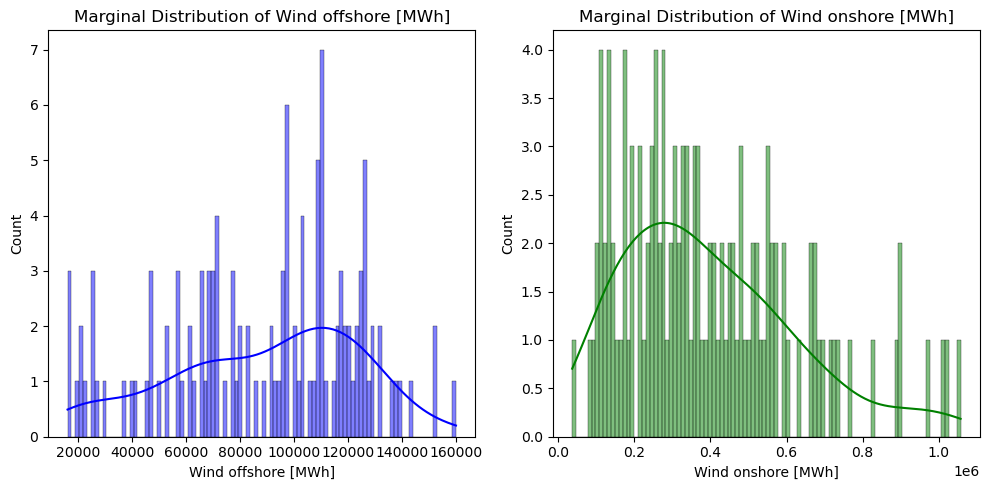

In [10]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned[feature1], bins=100, kde=True, color='blue')
plt.title("Marginal Distribution of " + feature1)

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned[feature2], bins=100, kde=True, color='green')
plt.title("Marginal Distribution of " + feature2)
plt.tight_layout()
plt.show()

### Plot scatter plot

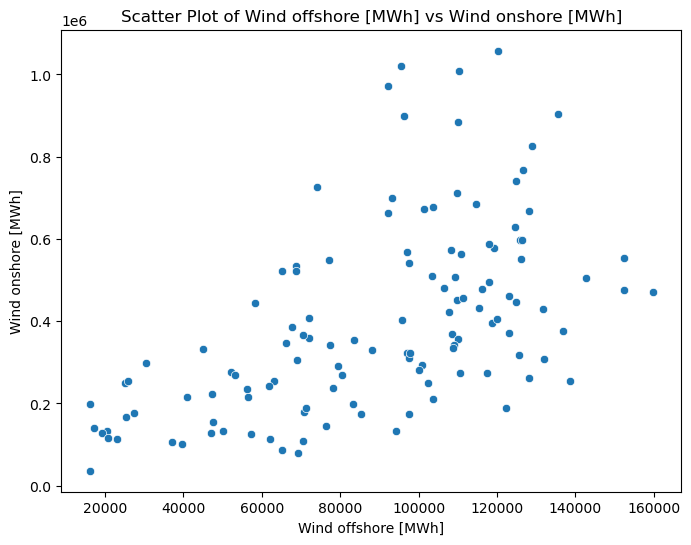

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature1, y=feature2, data=data_cleaned)
plt.title("Scatter Plot of " + feature1 + " vs " + feature2)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

In [14]:
# Calculate Pearson correlation
pearson_corr = data_cleaned[[feature1, feature2]].corr().iloc[0, 1]
print("Pearson Correlation Coefficient:", pearson_corr)

# Interpretation
if pearson_corr > 0:
    print("The features are positively correlated.")
elif pearson_corr < 0:
    print("The features are negatively correlated.")
else:
    print("The features are uncorrelated.")

Pearson Correlation Coefficient: 0.5560304114749671
The features are positively correlated.


Based on the Pearson correlation coefficient of 0.556 between wind offshore and wind onshore electricity generation, it indicates a moderate positive correlation. This suggests that as the electricity generation from wind offshore increases, we can expect a corresponding increase in electricity generation from wind onshore, and vice versa. While the correlation is not exceptionally strong, it still indicates a noticeable tendency for the two variables to move together in the same direction.

### 2. To create a joint probability mass function (pmf) plot for the two numerical features and fit a 2-variate Gaussian distribution to the data, we'll follow these steps:

1. Plot the joint pmf in a 3D plot.
2. Calculate the standard deviations (σ1, σ2) and the covariance of the two features.
3. Use these values as hyperparameters for a 2-variate Gaussian distribution.
4. Plot the 2-variate Gaussian distribution

#### Plot the joint pmf in a 3D plot

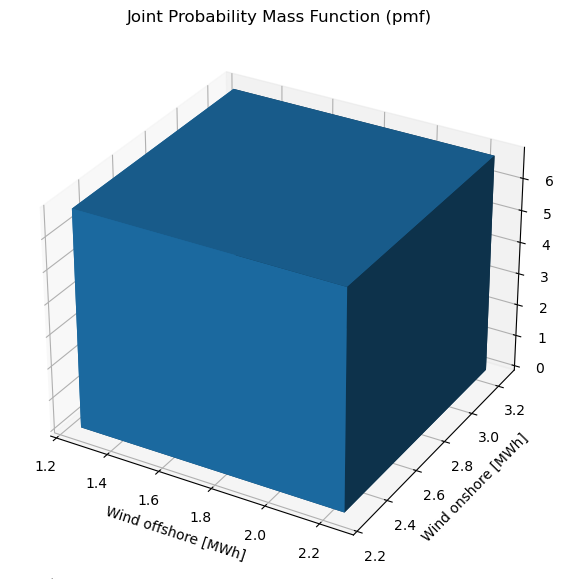

In [38]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Extract the features
feature1_data = data_cleaned[feature1]
feature2_data = data_cleaned[feature2]

# Create a 2D histogram for the joint pmf
hist, xedges, yedges = np.histogram2d(feature1_data, feature2_data, bins=1, density=True)

# Create grid for 3D plot
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = np.ones_like(zpos)
dz = hist.ravel()

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')

# Labeling
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('Probability')

plt.title("Joint Probability Mass Function (pmf)")
plt.show()

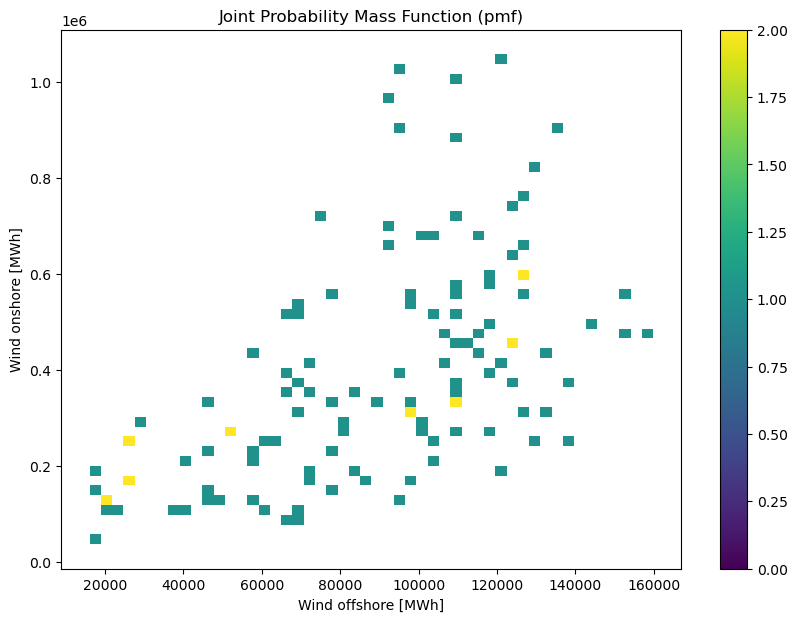

In [26]:
import seaborn as sns

# Create a heatmap for the joint pmf
plt.figure(figsize=(10, 7))
sns.histplot(x=feature1_data, y=feature2_data, bins=50, cmap='viridis', cbar=True)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Joint Probability Mass Function (pmf)")
plt.show()


### calculate the standard deviations (σ1, σ2) and the covariance of the two features:

In [22]:
# Calculate standard deviations and covariance
sigma1 = np.std(feature1_data)
sigma2 = np.std(feature2_data)
covariance = np.cov(feature1_data, feature2_data)[0, 1]

print("Standard Deviation of", feature1 + ":", sigma1)
print("Standard Deviation of", feature2 + ":", sigma2)
print("Covariance between", feature1, "and", feature2 + ":", covariance)


Standard Deviation of Wind offshore [MWh]: 34708.80575485564
Standard Deviation of Wind onshore [MWh]: 227044.35967160854
Covariance between Wind offshore [MWh] and Wind onshore [MWh]: 4417976426.421633


### create and plot the 2-variate Gaussian distribution

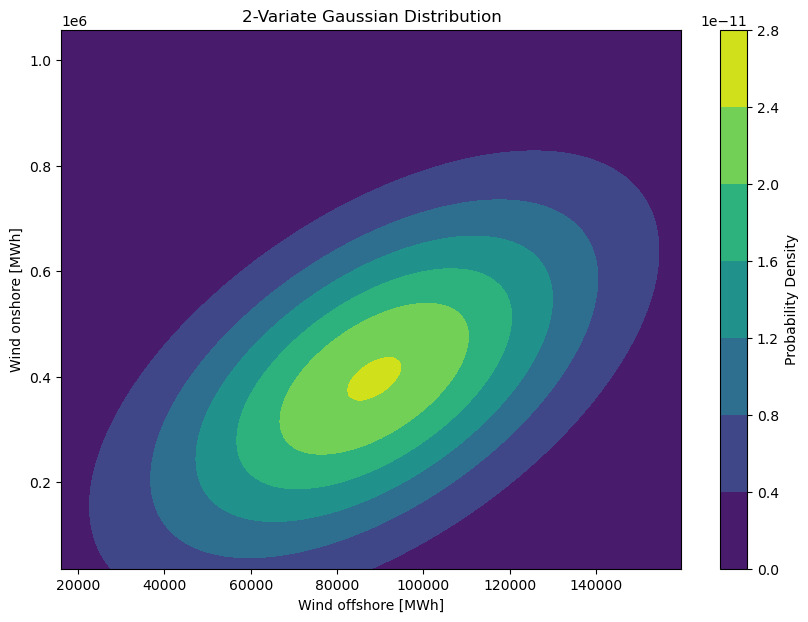

In [23]:
from scipy.stats import multivariate_normal

# Create a grid of points
x, y = np.meshgrid(np.linspace(feature1_data.min(), feature1_data.max(), 100),
                   np.linspace(feature2_data.min(), feature2_data.max(), 100))
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

# Create the 2-variate Gaussian distribution
rv = multivariate_normal(mean=[feature1_data.mean(), feature2_data.mean()], 
                          cov=[[sigma1 ** 2, covariance], [covariance, sigma2 ** 2]])

# Plot the Gaussian distribution
plt.figure(figsize=(10, 7))
plt.contourf(x, y, rv.pdf(pos), cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("2-Variate Gaussian Distribution")
plt.colorbar(label='Probability Density')
plt.show()


Based on the standard deviations and covariance calculated for the features "Wind offshore [MWh]" and "Wind onshore [MWh]", let's analyze whether a 2-variate Gaussian distribution is a good statistical model:

1. Standard Deviations: The standard deviation of "Wind offshore [MWh]" is 34708.81, and the standard deviation of "Wind onshore [MWh]" is 227044.36. These values indicate the spread or variability of the data points around their respective means.

2. Covariance: The covariance between "Wind offshore [MWh]" and "Wind onshore [MWh]" is 4417976426.42. This indicates the direction and strength of the linear relationship between the two features. A positive covariance suggests that as one feature increases, the other tends to increase as well.

Now, let's assess the Gaussian distribution plotted based on these parameters:

- The large difference in standard deviations between the two features suggests that the data points are not distributed symmetrically around their means.
- The covariance value indicates a positive linear relationship between the features, which is captured by the Gaussian distribution.
- However, the spread of the data points in each dimension may not be well-represented by a Gaussian distribution due to the significant difference in standard deviations.
